Для отклика на вакансию предлагаем Вам выполнить тестовое задание
Есть 2 группы студентов одна их которых ходила на подготовительные курсы, другая нет.
Нужно понять повлияло ли посещение курсов на балл студентов между группами.

Данные по результатам находятся по ссылке ниже и предоставлены в виде 3 файлов
https://gist.github.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef

Задание необходимо выполнить с помощью Python.
В ответе можете приложить выполненный код, ссылку на gist или jupyter notebook. 
Будет здорово, если вы сопроводите решение небольшим рассуждением или комментариями.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import variance
from scipy.stats import shapiro
from scipy import stats as st

In [2]:
try:
    after_score = pd.read_csv('student_after_score.csv')
    before_score = pd.read_csv('student_before_score.csv')
    group = pd.read_csv('student_group.csv')
except:
    raise Exception('Check the files')

In [3]:
def get_general_info(df: pd.DataFrame) -> None:
    """
    Функция выводит базовую инфу по датасету
    одним полем
    """
    display(df.head())
    display(df.info())
    display(df.describe())
    print('Количество пропусков:')
    display(df.isna().sum())
    print(f'Количество дубликатов: {df.duplicated().sum()}')

In [4]:
get_general_info(after_score)

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   1000 non-null   int64
 1   after_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


None

,student_id,after_score
count,1000.000000,1000.000000
mean,500.500000,84.623000
std,288.819436,8.641154
min,1.000000,70.000000
25%,250.750000,77.000000
50%,500.500000,85.000000
75%,750.250000,92.000000
max,1000.000000,99.000000


Количество пропусков:


student_id     0
after_score    0
dtype: int64

Количество дубликатов: 0


In [5]:
get_general_info(before_score)

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   student_id    1000 non-null   int64
 1   before_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


None

,student_id,before_score
count,1000.000000,1000.00000
mean,500.500000,63.92500
std,288.819436,14.59851
min,1.000000,40.00000
25%,250.750000,51.00000
50%,500.500000,64.00000
75%,750.250000,77.00000
max,1000.000000,89.00000


Количество пропусков:


student_id      0
before_score    0
dtype: int64

Количество дубликатов: 0


In [6]:
get_general_info(group)

,student_id,group
0,1,no_course
1,2,course
2,3,course
3,4,course
4,5,course


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  1000 non-null   int64 
 1   group       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


None

,student_id
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


Количество пропусков:


student_id    0
group         0
dtype: int64

Количество дубликатов: 0


Явных проблем с данными не видно. Объединим таблицы.

In [7]:
data = before_score.merge(after_score, on='student_id', how='outer')
data = data.merge(group, on='student_id', how='outer')

In [8]:
data.head()

,student_id,before_score,after_score,group
0,1,75,92,no_course
1,2,81,79,course
2,3,58,92,course
3,4,47,90,course
4,5,76,98,course


In [9]:
# еще раз проверим на пропуски после объединения
data.isna().sum()

student_id      0
before_score    0
after_score     0
group           0
dtype: int64

In [10]:
# постотрим на распределение групп: кто проходил и не проходил курсы
is_course = data['group'].value_counts()
is_course

no_course    512
course       488
Name: group, dtype: int64

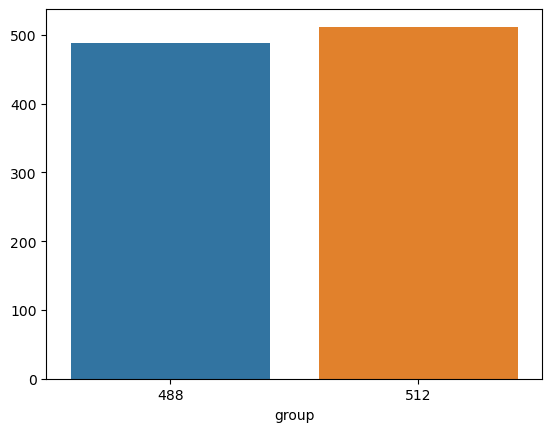

In [11]:
# то же в формате графика
sns.barplot(is_course, x=is_course.index, y=is_course.values);

Как видим, количество участников в двух группах почти не отличается.

In [12]:
# проверим, что в данных нет неуникальных id
len(data['student_id'].unique())

1000

In [13]:
# посмотрим чисто визуально, как менялись оценки у двух групп
students_no_course = data.query('group == "no_course"')
students_with_course = data.query('group == "course"')

<Axes: xlabel='student_id', ylabel='before_score'>

<Axes: xlabel='student_id', ylabel='before_score'>

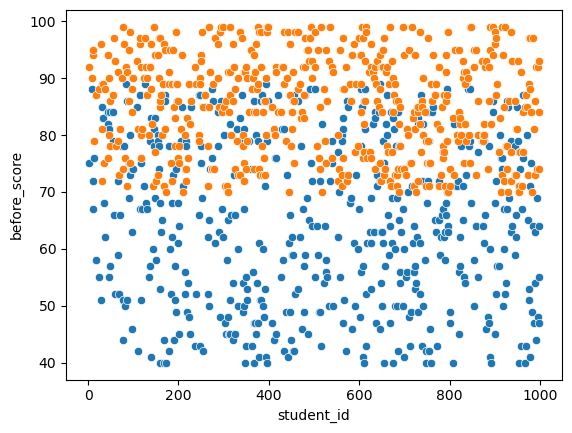

In [14]:
# не проходившие курс
display(sns.scatterplot(students_no_course, x=students_no_course['student_id'], y='before_score'))
display(sns.scatterplot(students_no_course, x=students_no_course['student_id'], y='after_score'))

<Axes: xlabel='student_id', ylabel='before_score'>

<Axes: xlabel='student_id', ylabel='before_score'>

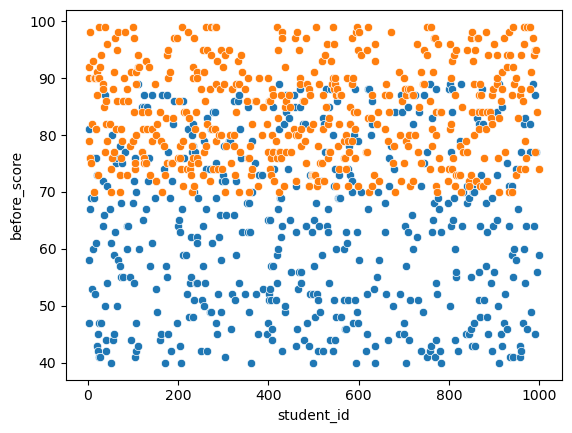

In [15]:
# и для проходивших курс
display(sns.scatterplot(students_with_course, x=students_with_course['student_id'], y='before_score'))
display(sns.scatterplot(students_with_course, x=students_with_course['student_id'], y='after_score'))

На графиках видна четкая взаимосвязь, что оценки после стали выше у обеих групп. Но это нам ничего не говорит о влиянии курсов как таковых. Можем проверить, если ли вообще разница в средних оценках обеих групп. Чтобы было интереснее, симулируем статистический тест для двух разных совокупностей (были курсы и не были) и сравним среднее оценок. Но перед этим проверим, что дисперсии равны, потом соберем среднее случайных выборок и удостоверимся, что данные в них распределены нормально хотя бы формально.

In [16]:
# проверим дисперсию «оценок после» двух генеральных совокупностей
print(variance(students_no_course['after_score']))
print(variance(students_with_course['after_score']))

75.63061093444227
72.80179334836907


Можно посчитать, что дисперсия равна. Возьмем штук 50 выборочных средних.

In [17]:
# обозначим стейт для воспроизводимости
RANDOM_STATE = np.random.RandomState(999)

In [18]:
def collect_sample(df: pd.DataFrame) -> list:
    """
    Функция собирает список средних
    50 случайных выборок
    """
    result = []
    for _ in range(50):
        sample = df.sample(frac=50, replace=True, random_state=RANDOM_STATE)
        result.append(sample.mean())
    return result

In [19]:
sample_no_course = collect_sample(students_no_course['after_score'])
sample_with_course = collect_sample(students_with_course['after_score'])

In [20]:
# прикинем формально, нормально ли распределены выборки средних при помощи теста Шапиро-Уилка
print(shapiro(sample_no_course))
print(shapiro(sample_with_course))

ShapiroResult(statistic=0.9762184619903564, pvalue=0.40567004680633545)
ShapiroResult(statistic=0.980290949344635, pvalue=0.5642974376678467)


Нельзя однозначно сказать о том, выборки не нормального распределения. Думаю, для дальнейшего теста это может хватить. Посчитаем нулевую гипотезу такой, что на самом деле средние двух совокупностей равны, а альтернативная — не равны.

In [21]:
def ttest_ind(df_1: list, df_2: list, alpha: float) -> str:
    """
    Функция оценивает статистически равенство
    средних из двух генеральных совокупностей
    """
    results = st.ttest_ind(df_1, df_2)
    if results.pvalue < alpha:
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'

In [22]:
ttest_ind(sample_no_course, sample_with_course, 0.05)

'Отвергаем нулевую гипотезу'

Проводить этот тест не имело большого смысла, так как сравнить равенство средних мы можем и просто так:

In [23]:
(students_no_course['after_score'].mean(), students_with_course['after_score'].mean())

(85.30859375, 83.90368852459017)

Но если бы данных было в сотни тысячи раз больше, то можно было бы оценивать статистически. Однако это по-прежнему не дает нам однозначного ответа о влиянии курсов на результаты. Даже если студенты, которые не ходили на курсы, остались с прежними оценками, то это все равно не дало бы уверенности в том, что дело именно в курсах, люди ведь разные + могут быть и другие факторы, которые не учтены. Я бы предложил сравнивать результаты одних и тех же людей, которые для одного тестирования ходили на курсы, а для другого — нет. Потом можно будет оценить разницу при помощи из `scipy.statst.test_rel()`, если возвращаться к статическим методам.

## Итог

По представленным данным нельзя дать ответ на вопрос о влиянии посещения курсов на полученные оценки.